<a href="https://colab.research.google.com/github/chaeyeon573/Sales-Analysis/blob/main/Cusomer_Analysis__06ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pandas, Numpy, Matplotlib, Seaborn을 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

In [ ]:
sales_data = pd.read_csv('/content/sales_7.csv')
customer_data = pd.read_csv('/content/customer_7.csv')

In [ ]:
customer_data.head()

,Customer_ID,Name,Nickname,Password,Email,Birth,Gender,C.P.,MobileCompany,OS
0,facilis140,이영순,quos,********,coejongsu@yu.kr,1989-03-11,female,01x9-4x625-x5x3x,LGU,iOS
1,debitis994,김중수,molestiae,********,jiweon02@ju.org,1995-11-19,male,01x9-3x228-x3x9x,KT,iOS
2,possimus246,양은경,rem,********,coesubin@jusighoesa.com,2005-12-24,female,01x9-7x873-x2x2x,LGU,Android
3,occaecati138,백도윤,libero,********,yeongceol80@gangryu.kr,2003-02-09,female,01x9-3x519-x7x1x,SKT,iOS
4,corrupti325,김영수,temporibus,********,jiweon96@yu.net,2004-05-04,male,01x9-0x079-x9x2x,LGU,Android


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99845 entries, 0 to 99844
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer_ID    99845 non-null  object
 1   Name           99845 non-null  object
 2   Nickname       99845 non-null  object
 3   Password       99845 non-null  object
 4   Email          99845 non-null  object
 5   Birth          99845 non-null  object
 6   Gender         99845 non-null  object
 7   C.P.           99845 non-null  object
 8   MobileCompany  99845 non-null  object
 9   OS             99845 non-null  object
dtypes: object(10)
memory usage: 7.6+ MB


In [ ]:
sales_data.info()
sales_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99845 entries, 0 to 99844
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   install      99845 non-null  object
 1   Time_stamp   99845 non-null  object
 2   Game_Name    99845 non-null  object
 3   Status       99845 non-null  object
 4   Payment      99845 non-null  int64 
 5   Customer_ID  99845 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


,install,Time_stamp,Game_Name,Status,Payment,Customer_ID
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325


In [ ]:
# sales_data와 customer_data를 Customer_ID열을 기준으로 합치고 customer_03 변수에 할당

customer_03 = pd.merge(sales_data, customer_data, on = "Customer_ID")

customer_03

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Name,Nickname,Password,Email,Birth,Gender,C.P.,MobileCompany,OS
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,이영순,quos,********,coejongsu@yu.kr,1989-03-11,female,01x9-4x625-x5x3x,LGU,iOS
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,김중수,molestiae,********,jiweon02@ju.org,1995-11-19,male,01x9-3x228-x3x9x,KT,iOS
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,양은경,rem,********,coesubin@jusighoesa.com,2005-12-24,female,01x9-7x873-x2x2x,LGU,Android
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,백도윤,libero,********,yeongceol80@gangryu.kr,2003-02-09,female,01x9-3x519-x7x1x,SKT,iOS
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,김영수,temporibus,********,jiweon96@yu.net,2004-05-04,male,01x9-0x079-x9x2x,LGU,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99840,2022-03-27,2022-03-27,SoccerManager,install,0,dicta630,김예지,sit,********,ggim@yuhanhoesa.com,1992-07-31,male,01x9-8x787-x6x7x,LGU,iOS
99841,2022-03-28,2022-03-28,SoccerManager,install,0,tempora976,문은경,modi,********,gimjeongnam@gimgweonjang.com,1990-09-17,male,01x9-5x401-x0x0x,KT,Android
99842,2022-03-26,2022-03-26,SoccerManager,install,0,iusto840,강중수,iusto,********,qu@gimgim.kr,1984-12-25,female,01x9-3x247-x9x7x,SKT,iOS
99843,2022-03-20,2022-03-20,SoccerManager,install,0,nemo273,황정남,deleniti,********,yejun90@imubag.com,1985-05-11,male,01x9-5x324-x8x7x,LGU,iOS


In [ ]:
# total_sales_data를 만들고 3월과 4월 데이터를 합치기
total_sales_data = pd.concat([customer_03, customer_04])

# total_sales_data 확인하기
total_sales_data

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Name,Nickname,Password,Email,Birth,Gender,C.P.,MobileCompany,OS
0,2022-01-08,2022-02-05,MineGround,play,4900.0,facilis140,이영순,quos,********,coejongsu@yu.kr,1989-03-11,female,01x9-4x625-x5x3x,LGU,iOS
1,2022-01-05,2022-02-17,MineGround,play,29900.0,debitis994,김중수,molestiae,********,jiweon02@ju.org,1995-11-19,male,01x9-3x228-x3x9x,KT,iOS
2,2022-01-29,2022-02-06,MineGround,play,4900.0,possimus246,양은경,rem,********,coesubin@jusighoesa.com,2005-12-24,female,01x9-7x873-x2x2x,LGU,Android
3,2022-01-09,2022-02-05,MineGround,play,900.0,occaecati138,백도윤,libero,********,yeongceol80@gangryu.kr,2003-02-09,female,01x9-3x519-x7x1x,SKT,iOS
4,2022-01-08,2022-02-01,MineGround,play,900.0,corrupti325,김영수,temporibus,********,jiweon96@yu.net,2004-05-04,male,01x9-0x079-x9x2x,LGU,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35118,2022-01-31,2022-04-29,MineGround,play,0.0,recusandae058,김지민,alias,********,sujingim@ibag.net,1984-08-03,female,01x9-0x111-x9x3x,SKT,iOS
35119,2022-03-23,2022-04-27,MineGround,play,0.0,ullam594,권도현,ullam,********,isangho@yuhanhoesa.kr,1991-01-07,male,01x9-3x090-x2x2x,LGU,iOS
35120,2022-01-27,2022-04-21,MineGround,play,0.0,occaecati392,박건우,rem,********,gojunhyeog@heogangi.com,1987-08-22,male,01x9-7x249-x8x2x,SKT,iOS
35121,2022-01-17,2022-04-26,MineGround,play,0.0,iste926,장민재,earum,********,gimhyeonjun@ju.org,2005-10-14,male,01x9-0x450-x8x0x,KT,iOS


In [ ]:
customer_04 = pd.read_csv('/content/customer_04_7.csv')
customer_04.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Name,Nickname,Password,Email,Birth,Gender,C.P.,MobileCompany,OS
0,2022-03-12,2022-04-03,MineGround,play,19900.0,cupiditate206,우은정,tempora,********,jangsugja@ijijang.com,1987-05-31,female,01x9-2x483-x1x2x,SKT,Android
1,2022-01-25,2022-04-03,MineGround,play,0.0,quis973,박지아,unde,********,gimjieun@yuhanhoesa.com,2000-01-24,male,01x9-4x193-x4x2x,KT,Android
2,2022-01-20,2022-04-02,SoccerManager,play,49900.0,ex368,김하윤,animi,********,jangyeongil@gimcoe.org,1984-05-16,male,01x9-1x376-x1x2x,MVNO,Android
3,2022-01-18,2022-04-04,SoccerManager,play,0.0,labore792,최경자,asperiores,********,jangjeongsig@ju.com,1984-02-21,female,01x9-6x056-x4x5x,SKT,iOS
4,2022-02-11,2022-04-26,SoccerManager,play,900.0,quibusdam041,류민재,fugit,********,cgang@jusighoesa.com,2004-11-06,female,01x9-6x314-x5x1x,MVNO,iOS


In [ ]:
# 코드를 직접 작성해 보세요.

# total_sales_data의 Status 열 값이 play인 행들만 골라 player_data 변수로 정의
# [[YOUR CODE]]

player_data = total_sales_data[total_sales_data['Status']=='play'].copy()
player_data

# player_data의 date열을 만들고, player_data의 Time_stamp 값 중 앞에서 7번째 값까지 입력
# [[YOUR CODE]]

player_data['date'] =player_data['Time_stamp'].str[:7]

# # # player_data의 head 값 확인
# # # [[YOUR CODE]]
player_data.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Name,Nickname,Password,Email,Birth,Gender,C.P.,MobileCompany,OS,date
0,2022-01-08,2022-02-05,MineGround,play,4900.0,facilis140,이영순,quos,********,coejongsu@yu.kr,1989-03-11,female,01x9-4x625-x5x3x,LGU,iOS,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900.0,debitis994,김중수,molestiae,********,jiweon02@ju.org,1995-11-19,male,01x9-3x228-x3x9x,KT,iOS,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900.0,possimus246,양은경,rem,********,coesubin@jusighoesa.com,2005-12-24,female,01x9-7x873-x2x2x,LGU,Android,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900.0,occaecati138,백도윤,libero,********,yeongceol80@gangryu.kr,2003-02-09,female,01x9-3x519-x7x1x,SKT,iOS,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900.0,corrupti325,김영수,temporibus,********,jiweon96@yu.net,2004-05-04,male,01x9-0x079-x9x2x,LGU,Android,2022-02


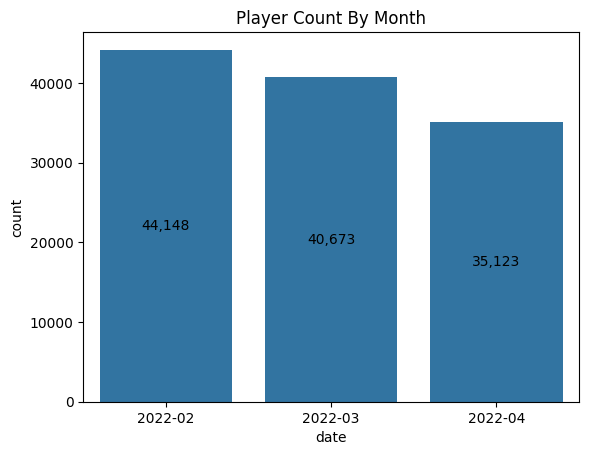

In [ ]:
#


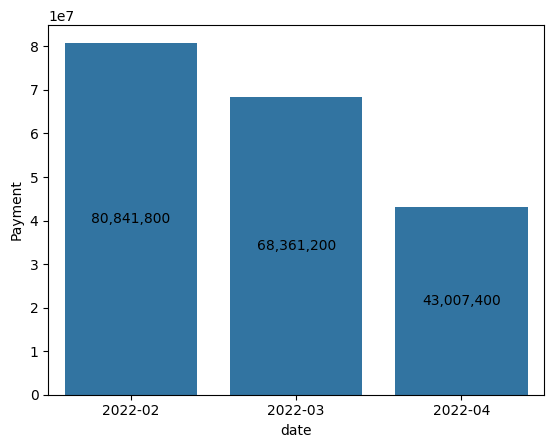

In [ ]:
# player_data의 Payment열의 각 개별값을 date열을 기준으로
# player_data에서 월별로 고객이 지불한 금액 집계

grouped = player_data['Payment'].groupby(player_data['date']).sum()

grouped = grouped.reset_index()

ax = sns.barplot(data = grouped, x = "date", y = "Payment")

container = ax.containers[0]
ax.bar_label(container, labels = [f'{x:,.0f}' for x in grouped['Payment']], label_type ='center')
plt.show()

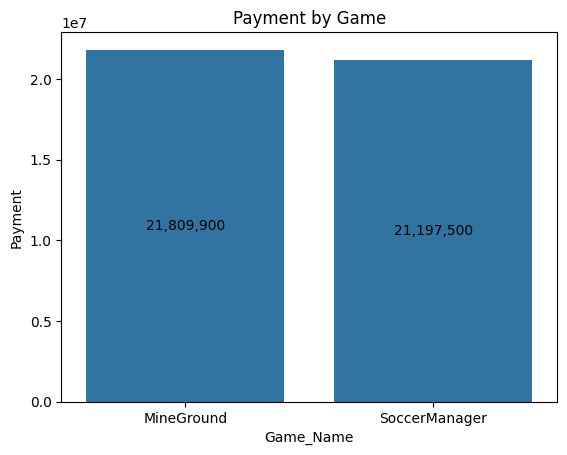

In [ ]:
grouped_April = player_data[player_data['date'] == '2022-04']
grouped_April

grouped_April_Payment = grouped_April['Payment'].groupby(grouped_April['Game_Name']).sum()
grouped_April_Payment = grouped_April_Payment.reset_index(drop = False)
grouped_April_Payment

ax = sns.barplot(data = grouped_April_Payment, x = 'Game_Name', y = "Payment")
plt.title("Payment by Game")
plt.xlabel("Game_Name")
plt.ylabel("Payment")

container = ax.containers[0]
ax.bar_label(container, labels = [f'{x:,.0f}' for x in container.datavalues], label_type ='center')
plt.show()




In [ ]:
grouped_April

grouped_April_By_Date =  grouped_April['Payment'].groupby([grouped_April['Time_stamp'], grouped_April['Game_Name']]).sum()
grouped_April_By_Date.unstack()

Game_Name,MineGround,SoccerManager
Time_stamp,,
2022-04-01,2052600.0,899700.0
2022-04-02,1574200.0,618200.0
2022-04-03,1603900.0,604600.0
2022-04-04,1763300.0,913400.0
2022-04-05,2235500.0,737900.0
2022-04-06,1579000.0,791800.0
2022-04-07,1695400.0,530000.0
2022-04-08,1616500.0,539400.0
2022-04-09,1776100.0,701600.0


Text(0, 0.5, 'Payment')

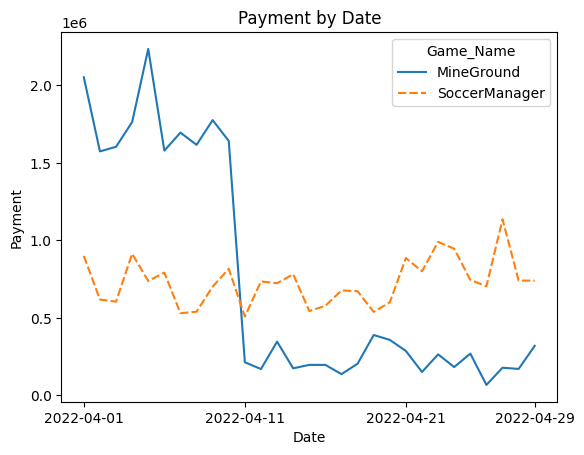

In [ ]:
ax = sns.lineplot(data = grouped_April_By_Date.unstack() )
plt.xticks([0,10,20,28])
plt.title("Payment by Date")
plt.xlabel("Date")
plt.ylabel("Payment")

Text(0, 0.5, 'Payment')

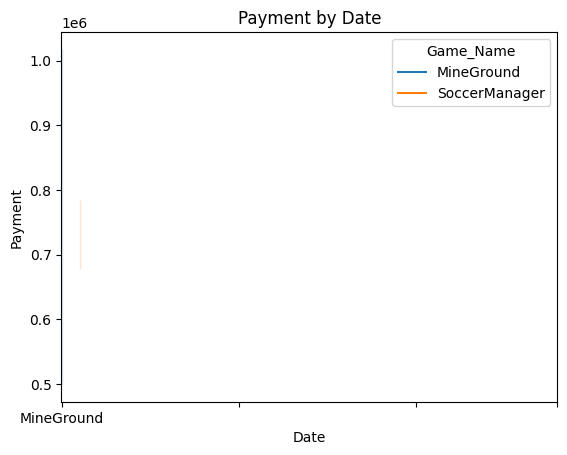

In [ ]:
# grouped_April_By_Date = grouped_April_By_Date.reset_index()
# grouped_April_By_Date
# ax = sns.lineplot(data = grouped_April_By_Date, x = "Game_Name", y = "Payment", hue = "Game_Name" )
# plt.xticks([0,10,20,28])
# plt.title("Payment by Date")
# plt.xlabel("Date")
# plt.ylabel("Payment")

In [ ]:
temp_var = pd.crosstab(grouped_April['Time_stamp'], grouped_April["Game_Name"])
temp_var.head()



Game_Name,MineGround,SoccerManager
Time_stamp,,
2022-04-01,1256,504
2022-04-02,1209,520
2022-04-03,1230,482
2022-04-04,1215,518
2022-04-05,1221,501


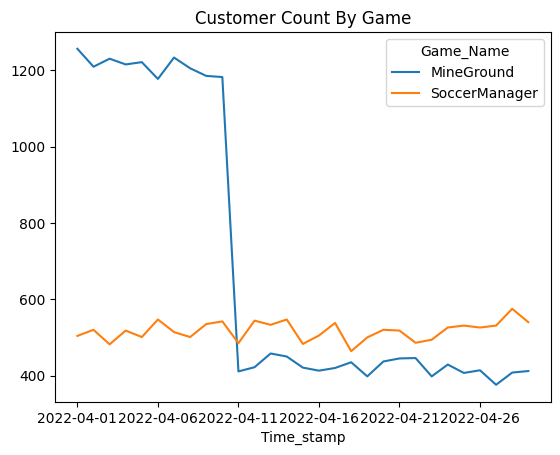

In [ ]:
temp_var.plot()
plt.title('Customer Count By Game')
plt.show()

In [ ]:


grouped_April_Mine_Ground = grouped_April[grouped_April['Game_Name']=="MineGround"]

temp_var = pd.crosstab(grouped_April_Mine_Ground['Time_stamp'], grouped_April_Mine_Ground["Gender"])
temp_var.head()

Gender,female,male
Time_stamp,,
2022-04-01,506,750
2022-04-02,485,724
2022-04-03,485,745
2022-04-04,457,758
2022-04-05,468,753


<Axes: xlabel='Time_stamp'>

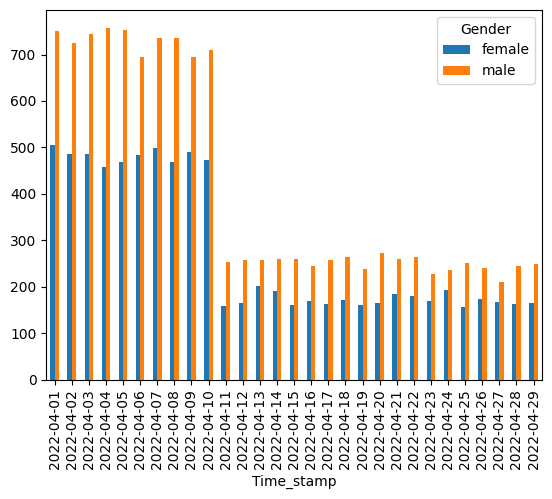

In [ ]:
# ax = sns.lineplot(data = temp_var)
# plt.title('Customer Count By Gender, date')
# plt.show()

temp_var.plot(kind = 'bar')

In [ ]:
# 연령별 집계를 위해 age열을 만들고 2022년 기준 날짜 계산해서 할당하기
grouped_April_Mine_Ground['age'] = 2022 - pd.to_numeric(grouped_April_Mine_Ground['Birth'].str[:4])

grouped_April_Mine_Ground_by_age = pd.crosstab(grouped_April_Mine_Ground['Time_stamp'], grouped_April_Mine_Ground['age'])
grouped_April_Mine_Ground_by_age

# 연령별 집계를 위해 age열을 만들고 2022년 기준 날짜 계산해서 할당하기


# 연령에 따른 일자 고객 숫자 집계하기

<ipython-input-77-61e379deb546>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_April_Mine_Ground['age'] = 2022 - pd.to_numeric(grouped_April_Mine_Ground['Birth'].str[:4])


age,16,17,18,19,20,21,22,23,24,25,...,32,33,34,35,36,37,38,39,40,41
Time_stamp,,,,,,,,,,,,,,,,,,,,,
2022-04-01,15,52,61,37,45,38,38,49,63,53,...,44,61,43,59,55,53,55,46,52,42
2022-04-02,20,40,52,47,52,44,36,61,52,50,...,47,49,43,41,43,46,44,53,48,38
2022-04-03,11,55,48,43,54,51,41,46,46,47,...,59,26,50,50,47,64,40,52,39,43
2022-04-04,10,45,42,48,42,60,38,51,52,48,...,50,51,51,49,55,56,50,53,49,35
2022-04-05,14,49,49,42,51,42,42,43,38,50,...,60,49,53,48,56,52,49,43,48,47
2022-04-06,14,45,63,38,49,48,40,50,36,39,...,57,47,47,55,37,66,41,60,47,35
2022-04-07,8,56,59,43,43,37,48,34,43,45,...,57,48,55,47,49,48,52,57,40,44
2022-04-08,12,52,43,44,55,35,46,43,49,43,...,37,55,39,47,41,42,48,51,48,50
2022-04-09,10,48,36,40,42,51,48,47,52,48,...,47,55,34,58,56,55,55,39,51,31


In [ ]:
grouped_April_Mine_Ground.describe()

,Payment,age
count,20113.000000,20113.000000
mean,1084.368319,28.851787
std,5324.961322,7.238312
min,0.000000,16.000000
25%,0.000000,23.000000
50%,0.000000,29.000000
75%,0.000000,35.000000
max,49900.000000,41.000000


In [ ]:
grouped_April_Mine_Ground

bins = [16,20,30,40,50]

bins_label = ['10','20','30','40']

grouped_April_Mine_Ground['Generation'] = pd.cut(grouped_April_Mine_Ground['age'], bins,right=False, labels=bins_label)

temp_var = pd.crosstab(grouped_April_Mine_Ground['Time_stamp'], grouped_April_Mine_Ground['Generation'])
temp_var.head()

<ipython-input-88-a647a10b22b5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_April_Mine_Ground['Generation'] = pd.cut(grouped_April_Mine_Ground['age'], bins,right=False, labels=bins_label)


Generation,10,20,30,40
Time_stamp,,,,
2022-04-01,165,476,521,94
2022-04-02,159,500,464,86
2022-04-03,157,499,492,82
2022-04-04,145,486,500,84
2022-04-05,154,467,505,95


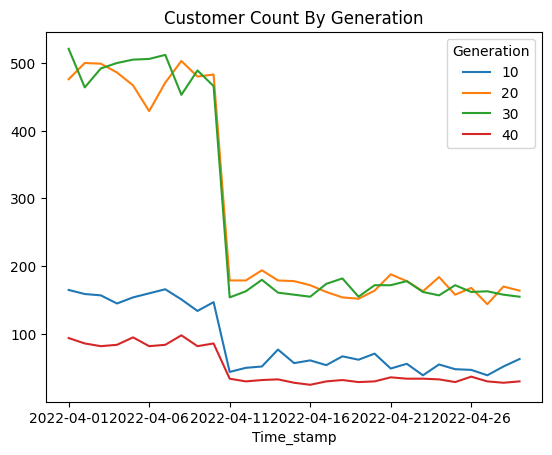

In [ ]:
temp_var.plot()
plt.title("Customer Count By Generation")
plt.show()

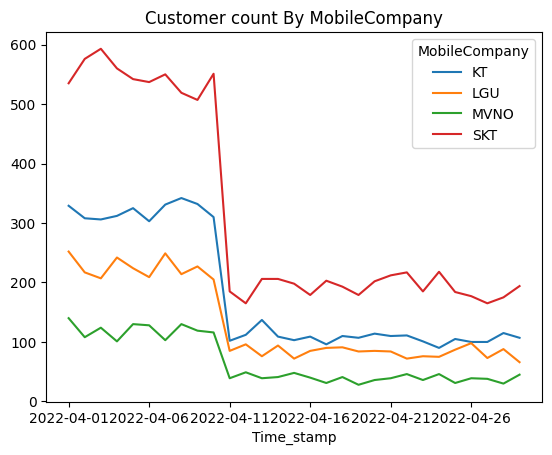

In [ ]:
temp_var = pd.crosstab(grouped_April_Mine_Ground['Time_stamp'], grouped_April_Mine_Ground['MobileCompany'])
temp_var.head()

temp_var.plot()

plt.title("Customer count By MobileCompany")
plt.show()

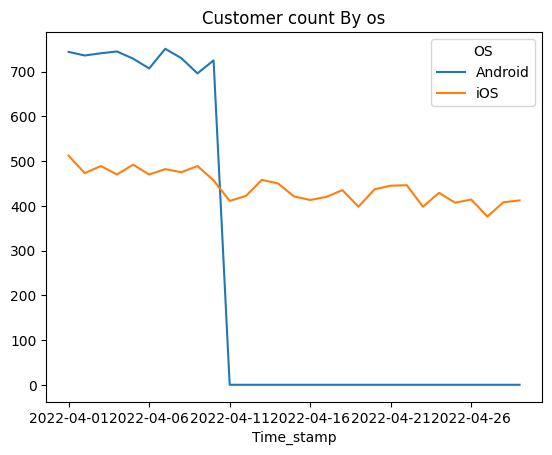

In [ ]:
temp_var = pd.crosstab(grouped_April_Mine_Ground['Time_stamp'], grouped_April_Mine_Ground['OS'])
temp_var.head()

temp_var.plot()

plt.title("Customer count By os")
plt.show()